In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Paths and parameters
dataset_path = r'D:\Projects\Python Projects\my-project\downthemall\yoga'
img_size = (128, 128)
batch_size = 32
epochs = 5

In [3]:
# Load all images from the folder
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to uniform size
            images.append(img)
    return np.array(images)


In [4]:
# Load the images (without classes)
X = load_images_from_folder(dataset_path, img_size)
X = X.astype('float16') / 255.0  # Normalize pixel values

In [5]:
print(f'Loaded {len(X)} images.')

Loaded 31818 images.


In [6]:
y = np.random.randint(0, 2, len(X)) 

In [7]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} images, Test set: {len(X_test)} images")

Training set: 25454 images, Test set: 6364 images


In [9]:
# Augment data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [10]:
# Define a CNN model
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # Adjust output layer based on number of classes
    return model

In [11]:
# Compile and train the model
model = create_model(X_train.shape[1:])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/5
796/796 [==============================] - 250s 312ms/step - loss: 0.7100 - accuracy: 0.5061 - val_loss: 0.6934 - val_accuracy: 0.5031
Epoch 2/5
796/796 [==============================] - 227s 285ms/step - loss: 0.6962 - accuracy: 0.5081 - val_loss: 0.6932 - val_accuracy: 0.5031
Epoch 3/5
796/796 [==============================] - 225s 283ms/step - loss: 0.6958 - accuracy: 0.5020 - val_loss: 0.6942 - val_accuracy: 0.4969
Epoch 4/5
796/796 [==============================] - 242s 304ms/step - loss: 0.6955 - accuracy: 0.4993 - val_loss: 0.6943 - val_accuracy: 0.5031
Epoch 5/5
796/796 [==============================] - 229s 287ms/step - loss: 0.6959 - accuracy: 0.5026 - val_loss: 0.6949 - val_accuracy: 0.5031


In [12]:
# Evaluate model performance on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

199/199 [==============================] - 10s 51ms/step - loss: 0.6949 - accuracy: 0.5031
Test accuracy: 50.31%


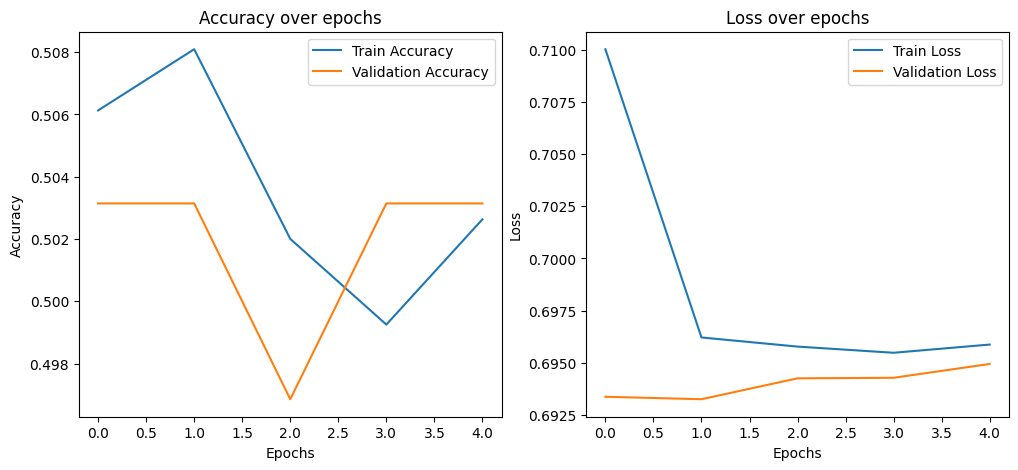

In [13]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)